In [2]:
import sys, os
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

In [3]:
df=pd.read_csv('fer2013.csv')

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1623 entries, 0 to 1622
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  1623 non-null   int64 
 1   pixels   1623 non-null   object
 2   Usage    1622 non-null   object
dtypes: int64(1), object(2)
memory usage: 38.2+ KB
None


In [6]:
print(df["Usage"].value_counts())

Training    1622
Name: Usage, dtype: int64


In [10]:
df.isnull().sum()

emotion    0
pixels     0
Usage      1
dtype: int64

In [11]:
X_train,train_y,X_test,test_y=[],[],[],[]

In [12]:
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

error occured at index :1622 and row:emotion                                                    3
pixels     247 240 236 253 248 234 241 248 245 250 247 24...
Usage                                                    NaN
Name: 1622, dtype: object


In [13]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width, height = 48, 48

In [14]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

In [15]:
train_y=np_utils.to_categorical(train_y, num_classes=num_labels)
test_y=np_utils.to_categorical(test_y, num_classes=num_labels)

In [16]:
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)


In [17]:
X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [18]:
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [19]:
##designing the cnn
#1st convolution layer
model = Sequential()

In [20]:
print(f"shape:{X_train.shape}")

shape:(1622, 48, 48, 1)


In [21]:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))

In [22]:
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

In [23]:
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

In [24]:
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels, activation='softmax'))

In [25]:
# model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])


In [26]:
#Training the model
model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)

Epoch 1/50
26/26 [==============================] - 8s 61ms/step - loss: 1.8617 - accuracy: 0.2063
Epoch 2/50
26/26 [==============================] - 1s 37ms/step - loss: 1.8208 - accuracy: 0.2333
Epoch 3/50
26/26 [==============================] - 1s 38ms/step - loss: 1.8264 - accuracy: 0.1872
Epoch 4/50
26/26 [==============================] - 1s 37ms/step - loss: 1.8194 - accuracy: 0.2232
Epoch 5/50
26/26 [==============================] - 1s 37ms/step - loss: 1.7961 - accuracy: 0.2355
Epoch 6/50
26/26 [==============================] - 1s 37ms/step - loss: 1.7593 - accuracy: 0.2487
Epoch 7/50
26/26 [==============================] - 1s 38ms/step - loss: 1.7119 - accuracy: 0.3145
Epoch 8/50
26/26 [==============================] - 1s 37ms/step - loss: 1.7004 - accuracy: 0.3037
Epoch 9/50
26/26 [==============================] - 1s 37ms/step - loss: 1.6209 - accuracy: 0.3429
Epoch 10/50
26/26 [==============================] - 1s 38ms/step - loss: 1.6092 - accuracy: 0.3552
Epoch 11/

In [27]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("fer.h5")

In [28]:
import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

In [29]:
#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('fer.h5')

In [30]:
face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
test_image = cv2.imread('IMG-20200919-WA0091.jpg')
cv2_imshow(test_image)

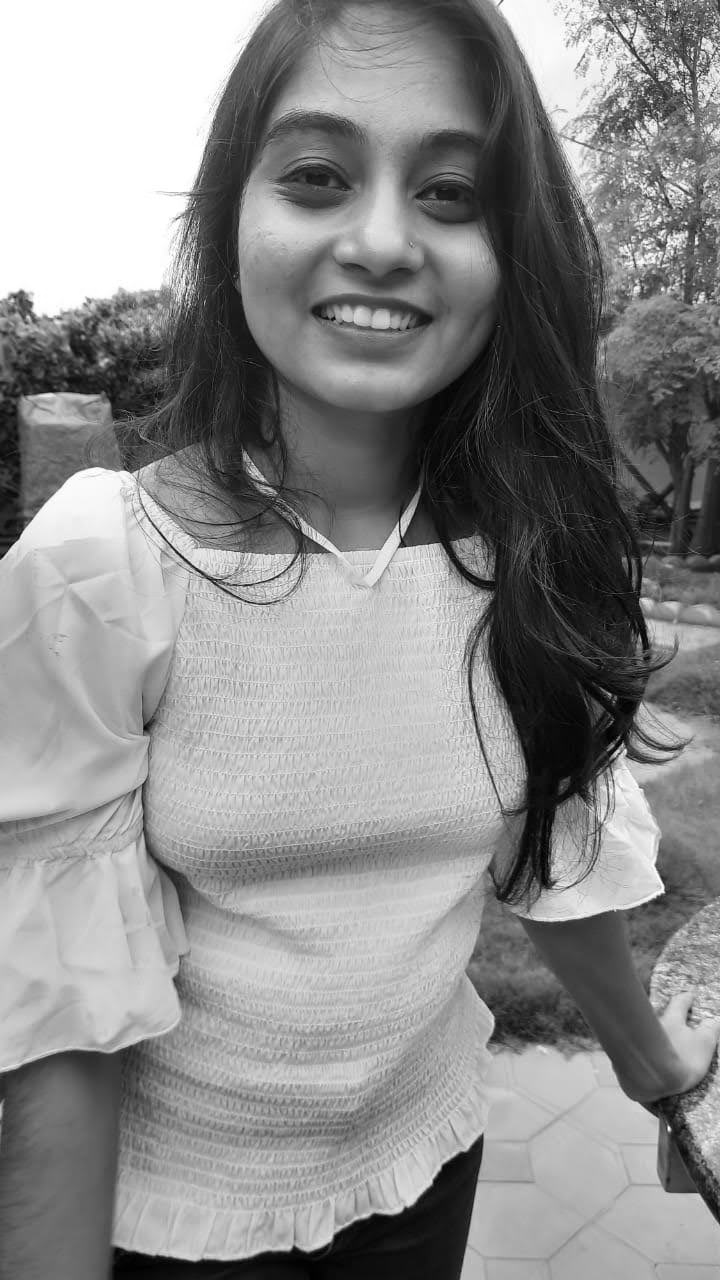

In [34]:
greay_image=cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
cv2_imshow(greay_image)

In [ ]:
!pip install keras

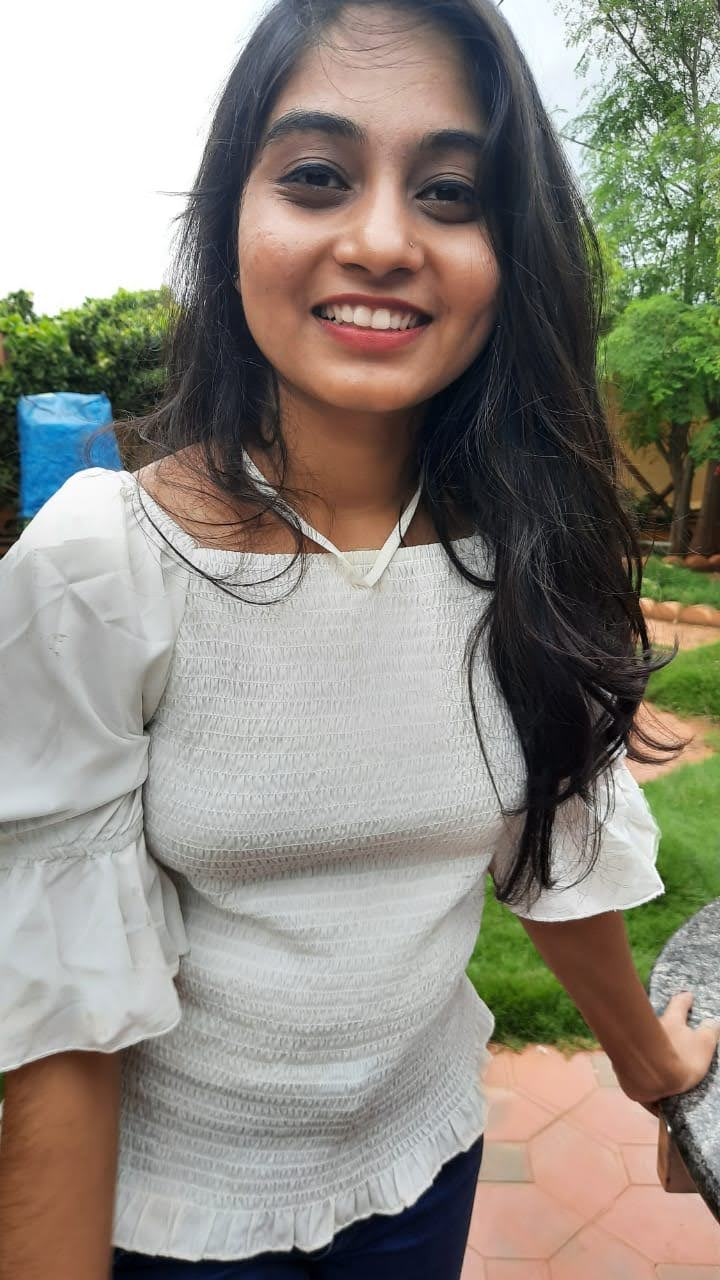

In [35]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
from keras.preprocessing.image import img_to_array
cv2_imshow(test_image)

happy


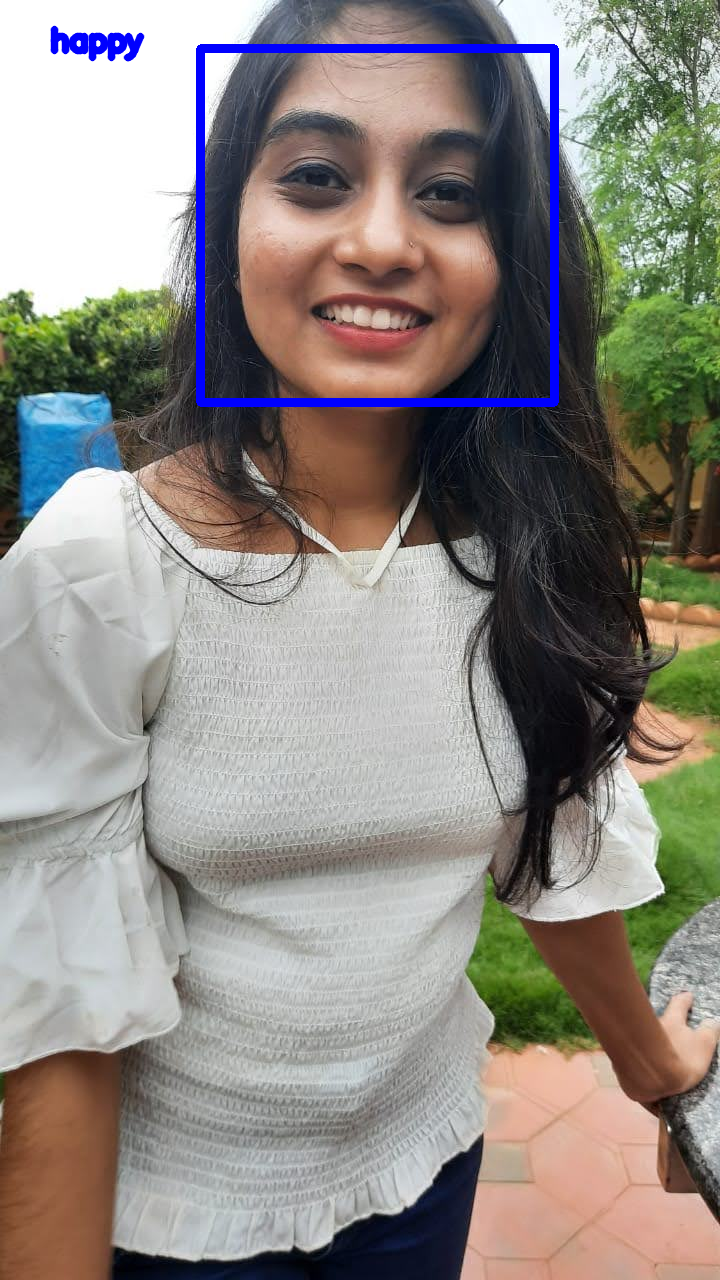

In [36]:
      faces_detected = face_haar_cascade.detectMultiScale(greay_image, 1.32, 5)
      for (x,y,w,h) in faces_detected:

        cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=greay_image[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
        predicted_emotion = emotions[max_index]
        print(predicted_emotion)
        font = cv2.FONT_HERSHEY_SIMPLEX
        org = (50,50)
        fontScale=1
        color=(255,0,0)
        thickness=6
        image = cv2.putText(test_image,predicted_emotion,org,font,fontScale,color,thickness,cv2.LINE_AA)
        cv2_imshow(image)

        #cv2.putText(test_img, predicted_emotion, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    #resized_img = cv2.resize(test_img, (1000, 700))
    #cv2.imshow('Facial emotion analysis ',resized_img)



    #if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
      #  break

#cap.release()
#cv2.destroyAllWindows